In [45]:
#install the necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#load the dataset
data=pd.read_excel("house.xlsx")

In [47]:
#shape of the dataset
data.shape

(17728, 41)

In [48]:
#printing starting five lines of dataset
data.head()

,City,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,Banglore,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,Banglore,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,Banglore,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,Banglore,8358000,1675,Doddanekundi,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Banglore,6845000,1670,Kengeri,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17728 entries, 0 to 17727
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   City                 17728 non-null  object
 1   Price                17728 non-null  int64 
 2   Area                 17728 non-null  int64 
 3   Location             17728 non-null  object
 4   No. of Bedrooms      17728 non-null  int64 
 5   Resale               17728 non-null  int64 
 6   MaintenanceStaff     17728 non-null  int64 
 7   Gymnasium            17728 non-null  int64 
 8   SwimmingPool         17728 non-null  int64 
 9   LandscapedGardens    17728 non-null  int64 
 10  JoggingTrack         17728 non-null  int64 
 11  RainWaterHarvesting  17728 non-null  int64 
 12  IndoorGames          17728 non-null  int64 
 13  ShoppingMall         17728 non-null  int64 
 14  Intercom             17728 non-null  int64 
 15  SportsFacility       17728 non-null  int64 
 16  ATM 

In [50]:
data['City'].unique()

array(['Banglore', 'Chennai', 'Kolkata'], dtype=object)

<AxesSubplot:xlabel='City', ylabel='count'>

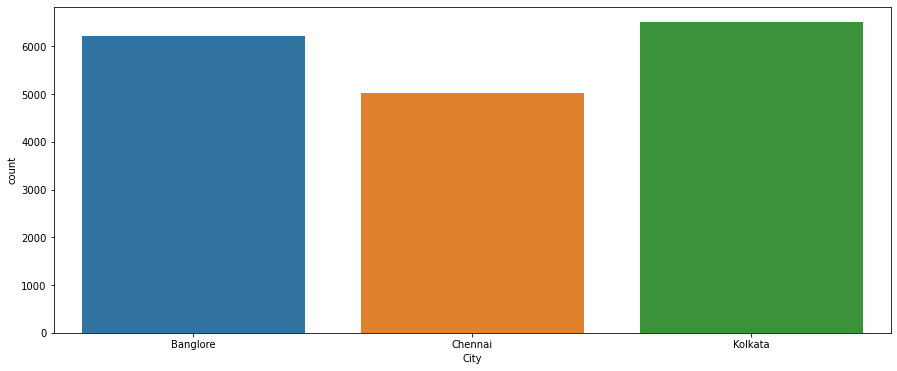

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(x='City', data=data)

In [52]:
data.isnull().sum()

City                   0
Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0


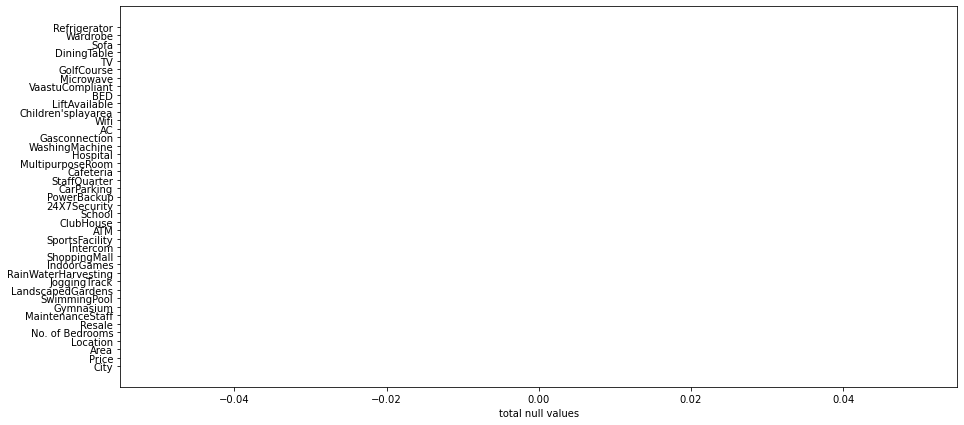

In [53]:
plt.figure(figsize=(15,7))
plt.barh(data.isnull().sum().index,width=data.isnull().sum().values)
plt.xlabel('total null values')
plt.show()

In [54]:
len(data.Location.unique())

793

In [55]:
location_count = data.groupby('Location').size().sort_values(ascending=False)
location_count

Location
New Town                711
Rajarhat                405
Tangra                  369
Dum Dum                 316
Garia                   307
                       ... 
Airport Area              1
Jatragachi Flyover        1
Murugesh Palya            1
Jalahalli West            1
200 Feet Radial Road      1
Length: 793, dtype: int64

In [56]:
len(location_count[location_count<=10])

516

In [57]:
location_less_10 = location_count[location_count<=10]

In [58]:
#if the location have less than 10 or 10 houses than that location are known as other location
data.Location = data.Location.apply(lambda x: 'other' if x in location_less_10 else x)

In [59]:
len(data.Location.unique())

278

In [60]:
data['bhk'] = data['No. of Bedrooms']
data.bhk.unique()

array([4, 2, 3, 1, 5, 6, 7, 9], dtype=int64)

In [61]:
data.Area = data.Area.astype(np.float64)
data = data[data.Area.notnull()]
data.head()

,City,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,bhk
0,Banglore,30000000,3340.0,JP Nagar Phase 1,4,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4
1,Banglore,7888000,1045.0,Dasarahalli on Tumkur Road,2,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,2
2,Banglore,4866000,1179.0,Kannur on Thanisandra Main Road,2,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,2
3,Banglore,8358000,1675.0,Doddanekundi,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Banglore,6845000,1670.0,Kengeri,3,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3


In [62]:
#create new column price_sqft that contain price per sqft
data['price_sqft'] = data.Price*100000/data.Area

In [63]:
#remove outlier using standard deviation
upper_limit = data.price_sqft.mean() + data.price_sqft.std()
lower_limit = data.price_sqft.mean() - data.price_sqft.std()
data = data[data.price_sqft<upper_limit] 
data = data[data.price_sqft > lower_limit]

In [64]:
#remove 2BHK house that price per sqft is less than the mean of 1bhk house price
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)# enter the data for number of bhk choosing
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)

In [65]:
data = data.drop('price_sqft',axis=1)

In [66]:
#apply one hot encoding in location column
dummies = pd.get_dummies(data.Location)
location_cat = pd.get_dummies(data.Location)
dummies.head()

,5th Phase,Abbigere,Adambakkam,Adugodi,Adyar,Alipore,Alwarpet,Ambattur,Anagalapura Near Hennur Main Road,Anekal City,...,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,Yeshwantpur,birati,kalikapur,other,sarjapura attibele road,south dum dum,tambaram west
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
data = pd.concat([data,dummies.drop('5th Phase',axis='columns')],axis='columns')
data.head()

,City,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,Yeshwantpur,birati,kalikapur,other,sarjapura attibele road,south dum dum,tambaram west
0,Banglore,30000000,3340.0,JP Nagar Phase 1,4,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,7888000,1045.0,Dasarahalli on Tumkur Road,2,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Banglore,4866000,1179.0,Kannur on Thanisandra Main Road,2,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Banglore,8358000,1675.0,Doddanekundi,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Banglore,6797000,1220.0,Horamavu,2,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data=data[['City','Price','Area','Location','No. of Bedrooms','LiftAvailable','Resale']]
data.rename(columns = {'No. of Bedrooms':'NoofBedrooms'}, inplace = True)

In [69]:
data = data.drop(['Location','City'] , axis=1)
data.head()

,Price,Area,NoofBedrooms,LiftAvailable,Resale
0,30000000,3340.0,4,1,0
1,7888000,1045.0,2,1,0
2,4866000,1179.0,2,1,0
3,8358000,1675.0,3,1,0
5,6797000,1220.0,2,1,0


In [70]:
#split data into dependent feature & independent feature
X = data.drop('Price',axis=1)

In [71]:
y=data['Price']

In [72]:
#split data into train-test split
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
regressor = cross_val_score(LinearRegression(), X, y, cv=cv)
regressor

array([0.55750911, 0.50840247, 0.52767167, 0.58828168, 0.54681624])

In [73]:
np.average(regressor)

0.5457362345777541

In [74]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [75]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [76]:
y_pred = model.predict(x_test)

In [77]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3242948.7997632897
30372731457523.867
5511146.111066542


In [78]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(x_train, y_train)
y_pred1 = ridge_reg.predict(x_test)
ridge_reg.score(x_test, y_test)

0.5574552395372757

In [79]:
print(metrics.mean_absolute_error(y_test,y_pred1))
print(metrics.mean_squared_error(y_test,y_pred1))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

3242947.138987178
30372723884034.42
5511145.423959925


In [80]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(x_train, y_train)
lasso_reg.score(x_test, y_test)

0.5574551314101334

In [81]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
dt_reg.score(x_test, y_test)

0.605439879283481

In [82]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)
regressor.score(x_test, y_test)

0.6846963553252192

In [83]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(x_train, y_train)
ab_reg.score(x_test, y_test)

0.638853814696115

In [85]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(x_train, y_train)
gb_reg.score(x_test, y_test)

0.7021692801768982

In [90]:
pred= model.predict([[3340,4,1,0]])

In [96]:
print(np.round_(pred,decimals=2))

[27370644.12]


In [88]:
#save the model
import pickle
with open('model.pkl', 'wb') as fh:
   pickle.dump(gb_reg, fh)